<a href="https://colab.research.google.com/github/silverstar0727/NLP_study/blob/main/ch6_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cd /content/drive/My Drive/ch6

/content/drive/My Drive/ch6


In [ ]:
!pip install -q konlpy

     |████████████████████████████████| 19.4MB 62.3MB/s 
     |████████████████████████████████| 92kB 9.1MB/s 
     |████████████████████████████████| 3.8MB 46.5MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter

from konlpy.tag import Okt

from functools import reduce
from wordcloud import WordCloud


data = pd.read_csv('ChatbotData .csv', encoding = 'utf-8')

In [ ]:
sentences = list(data['Q']) + list(data['A'])

tokenized_sentences = [s.split() for s in sentences] # 어절단위로 리스트화
sent_len_by_token = [len(t) for t in tokenized_sentences] # 길이를 리스트화
sent_len_by_eumjeol = [len(s.replace(' ', '')) for s in sentences] # 공백 제거

from konlpy.tag import Twitter
from konlpy.tag import Okt

okt = Okt() # konlpy의 형태소 분석기를 활용

morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in sentences]
sent_len_by_morph = [len(t) for t in morph_tokenized_sentences]

Text(0, 0.5, 'Number of Sentences')

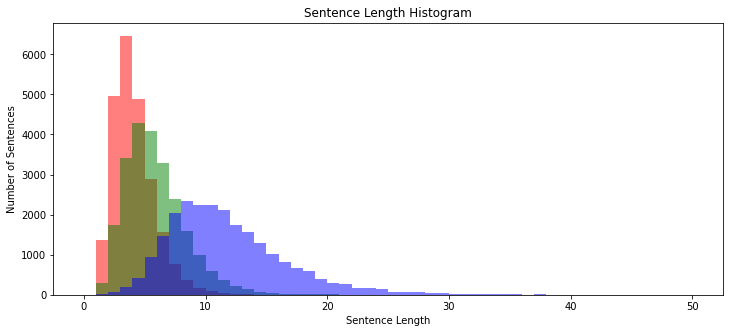

In [ ]:
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=50, range=[0,50], alpha=0.5, color= 'r', label='eojeol')
plt.hist(sent_len_by_morph, bins=50, range=[0,50], alpha=0.5, color='g', label='morph')
plt.hist(sent_len_by_eumjeol, bins=50, range=[0,50], alpha=0.5, color='b', label='eumjeol')
plt.title('Sentence Length Histogram')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')

Text(0, 0.5, 'Number of Sentences')

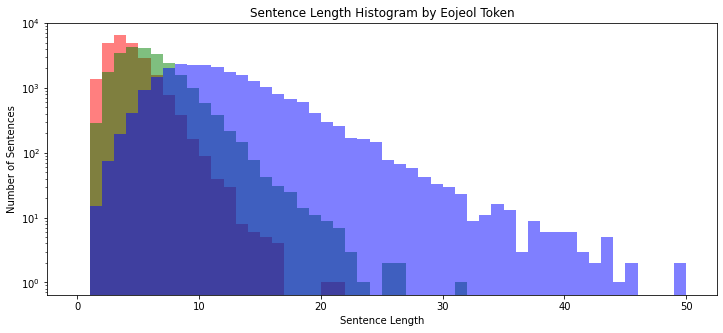

In [ ]:
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=50, range=[0,50], alpha=0.5, color= 'r', label='eojeol')
plt.hist(sent_len_by_morph, bins=50, range=[0,50], alpha=0.5, color='g', label='morph')
plt.hist(sent_len_by_eumjeol, bins=50, range=[0,50], alpha=0.5, color='b', label='eumjeol')
plt.yscale('log')
plt.title('Sentence Length Histogram by Eojeol Token')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')

{'boxes': [<matplotlib.lines.Line2D at 0x7fd6fee856a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd6feebb0b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd6feebbe80>,
 'means': [<matplotlib.lines.Line2D at 0x7fd6feebbb38>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd6feebb7b8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd6fee859b0>,
  <matplotlib.lines.Line2D at 0x7fd6fee59630>]}

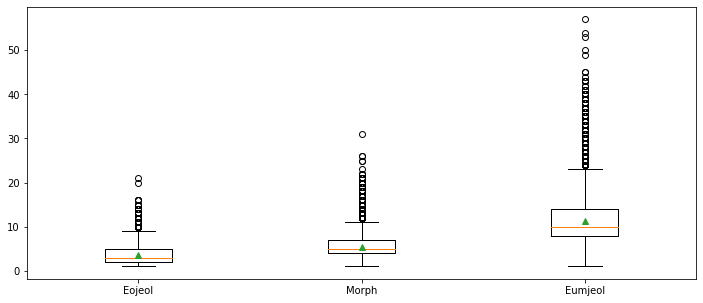

In [ ]:
plt.figure(figsize=(12, 5))
plt.boxplot([sent_len_by_token, sent_len_by_morph, sent_len_by_eumjeol],
            labels=['Eojeol', 'Morph', 'Eumjeol'], 
            showmeans=True)

In [ ]:

query_sentences = list(data['Q'])
answer_sentences = list(data['A'])

query_morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in query_sentences]
query_sent_len_by_morph = [len(t) for t in query_morph_tokenized_sentences]

answer_morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in answer_sentences]
answer_sent_len_by_morph = [len(t) for t in answer_morph_tokenized_sentences]

Text(0, 0.5, 'Number of Queries')

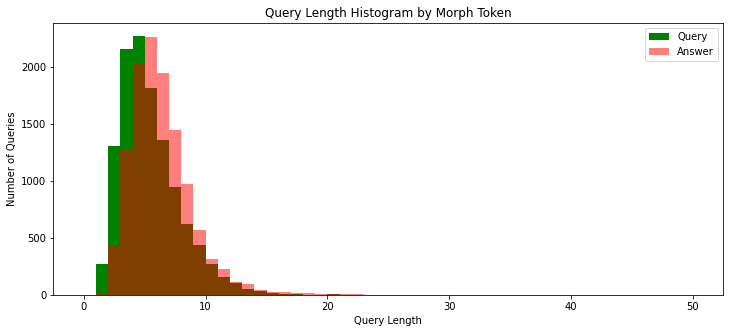

In [ ]:

plt.figure(figsize=(12, 5))
plt.hist(query_sent_len_by_morph, bins=50, range=[0,50], color='g', label='Query')
plt.hist(answer_sent_len_by_morph, bins=50, range=[0,50], color='r', alpha=0.5, label='Answer')
plt.legend()
plt.title('Query Length Histogram by Morph Token')
plt.xlabel('Query Length')
plt.ylabel('Number of Queries')

In [ ]:
query_len_by_morph.describe()

NameError: ignored

In [ ]:
answer_len_by_morph.describe()

In [ ]:
okt.pos('오늘밤은유난히덥구나')

In [ ]:
query_NVA_token_sentences = list()
answer_NVA_token_sentences = list()

for s in query_sentences:
    for token, tag in okt.pos(s.replace(' ', '')):
        if tag == 'Noun' or tag == 'Verb' or tag == 'Adjective':
            query_NVA_token_sentences.append(token)

for s in answer_sentences:
    temp_token_bucket = list()
    for token, tag in okt.pos(s.replace(' ', '')):
        if tag == 'Noun' or tag == 'Verb' or tag == 'Adjective':
            answer_NVA_token_sentences.append(token)
            
query_NVA_token_sentences = ' '.join(query_NVA_token_sentences)
answer_NVA_token_sentences = ' '.join(answer_NVA_token_sentences)

In [ ]:
query_wordcloud = WordCloud(font_path= DATA_IN_PATH + 'NanumGothic.ttf').generate(query_NVA_token_sentences)

plt.imshow(query_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
query_wordcloud = WordCloud(font_path= DATA_IN_PATH + 'NanumGothic.ttf').generate(answer_NVA_token_sentences)

plt.imshow(query_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()